<a href="https://colab.research.google.com/github/Nemat-Allah-Aloush/Advance_Machine_Leanring_Technologies/blob/main/AMLT_Task_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nemat Aloush
J42332c

## Instaling

In [7]:
pip install piq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 33.8 MB/s 


In [1]:
!git clone https://github.com/aigagror/ML-Aesthetics-NIMA.git

Cloning into 'ML-Aesthetics-NIMA'...
remote: Enumerating objects: 423, done.
remote: Total 423 (delta 0), reused 0 (delta 0), pack-reused 423
Receiving objects: 100% (423/423), 55.90 MiB | 17.01 MiB/s, done.
Resolving deltas: 100% (185/185), done.


### Importing

In [8]:
import torch
import piq
from skimage.io import imread
import numpy as np
import scipy.stats

import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pandas as pd

In [4]:
import sys
sys.path.append('/content/ML-Aesthetics-NIMA')
from main import rate

### Showing the images with my personal ranking of their quality.

In [9]:
# ranking the images: 5 the highest quality, 1 the leaset quality
name_rank = {'f10.jpg' : 2,
 'f11.jpg':3,
 'f5.jpg':3,
 'f19.jpg':5,
 'f14.jpg':2,
 'f7.jpg':1,
 'f6.jpg':2,
 'f12.jpg':4,
 'f4.jpg':3,
 'f17.jpg':5,
 'f16.jpg':5,
 'f9.jpg':4,
 'f15.jpg':3,
 'f8.jpg':4,
 'f18.jpg':4,
 'f3.jpg':4,
 'f20.jpg':4,
 'f2.jpg':1,
 'f13.jpg':4,
 'f1.jpg':1}

In [10]:
# Sorting the images according to their quality ranking
name_rank=dict(sorted(name_rank.items(), key=lambda item: item[1],  reverse=True))

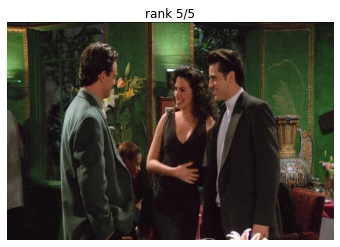

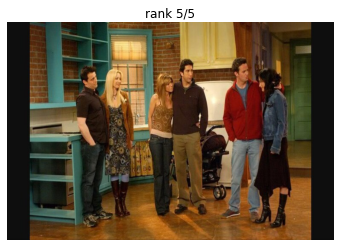

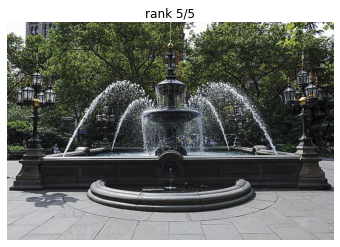

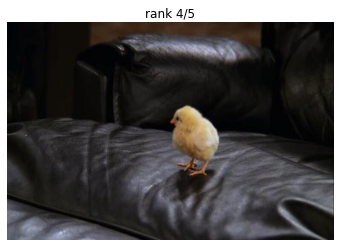

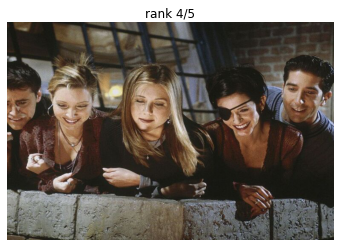

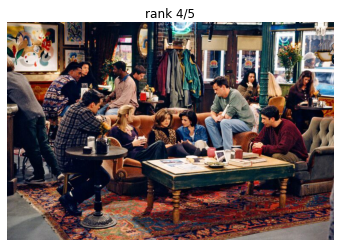

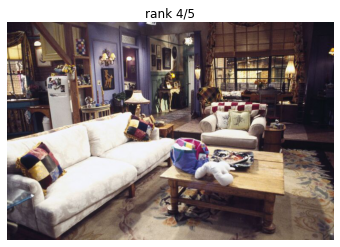

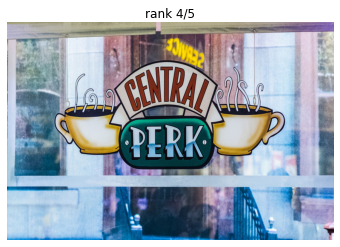

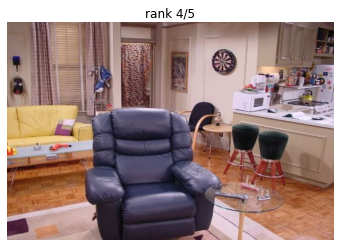

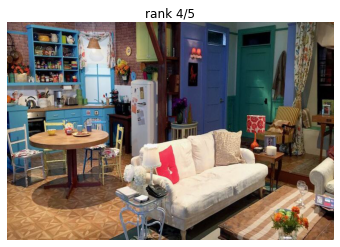

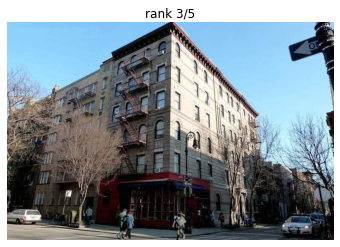

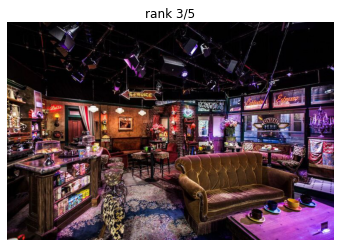

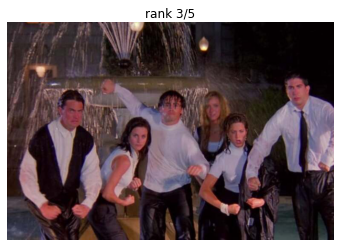

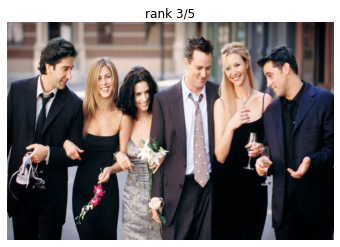

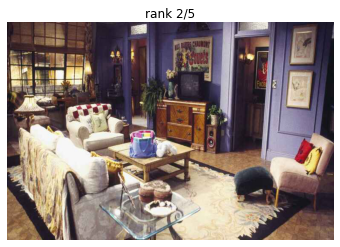

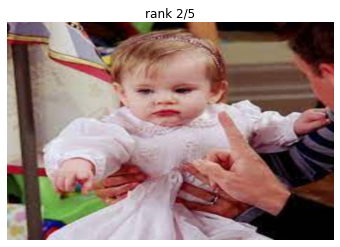

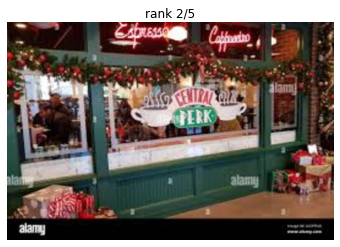

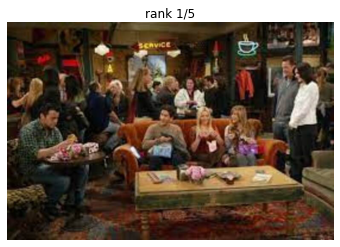

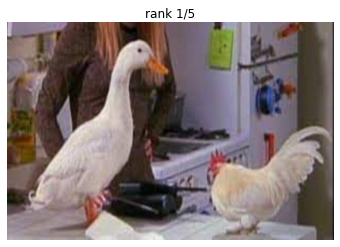

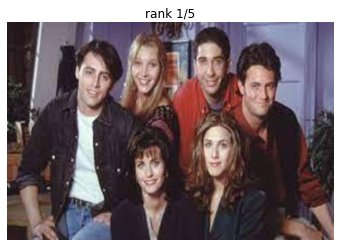

In [12]:
# Showing the images with their quality ranking
def process(filename):
    image = mpimg.imread('/content/FRIENDS/'+filename)
    plt.imshow(image)
    plt.title(f'rank {name_rank[filename]}/5')
    plt.axis('off')
    plt.show()
for file in name_rank.keys():
    process(file)  


### Calculating three Image Quality Assessment metrics: BRISQUE, TV, NIMA

In [14]:
# a list of the results
results= []

In [15]:
# loop over the images 
for file in name_rank.keys():
  # Read RGB image
  path = os.path.join('/content/FRIENDS/', file)
  # Reading the image to tensor
  x = torch.tensor(imread(path)).permute(2, 0, 1)[None, ...] / 255.
  if torch.cuda.is_available():
      # Move to GPU to make computaions faster
      x = x.cuda()
  ### BRISQUE ###
  # To compute BRISQUE score as a measure, use lower case function from the library
  brisque_index: torch.Tensor = piq.brisque(x, data_range=1., reduction='none')
  ### TV ###
  # To compute TV as a measure, use lower case function from the library:
  tv_index: torch.Tensor = piq.total_variation(x)
  # NIMA
  scores, mean, std = rate(os.path.join(path))
  # saving the results
  results.append({
      'image' : file,
      'human ranking': name_rank[file],
      'BRISQUE':brisque_index.item(),
      'TV':tv_index.item(),
      'NIMA mean': mean,
      'NIMA std': std})

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
# Converting to dataframe for further calculating the correlation
iqa_df = pd.DataFrame(results)

In [19]:
# Showing the Image Quality Assessment Matrics
iqa_df

,image,human ranking,BRISQUE,TV,NIMA mean,NIMA std
0,f19.jpg,5,17.923523,51.145760,5.424717,1.434739
1,f17.jpg,5,25.591980,59.896431,5.413808,1.433957
2,f16.jpg,5,24.908875,186.530579,5.399280,1.408935
3,f12.jpg,4,35.930359,23.079424,5.426506,1.417701
4,f9.jpg,4,2.125671,69.082283,5.420967,1.410617
5,f8.jpg,4,15.401550,130.149475,5.423034,1.412141
6,f18.jpg,4,19.378113,91.542610,5.412224,1.409272
7,f3.jpg,4,8.793640,116.173836,5.411084,1.453475
8,f20.jpg,4,20.713074,70.108772,5.419816,1.422779
9,f13.jpg,4,15.301941,96.565285,5.417603,1.443087


In [25]:
iqa_df.corr()['human ranking'][1:]

BRISQUE     -0.760082
TV           0.407345
NIMA mean   -0.130901
NIMA std    -0.290364
Name: human ranking, dtype: float64

Comparing the different image quality assessment metrics regarding the correlation value against human opinion, it seems that **BRISQUE** metric is the most correlated to the human opinion. Although the correlation value is negative but it's the strongest, that's because when using BRISQUE, images with better quality has lower score.